Utilizing Multinomial Naive Bayes for Enhanced Movie Genre Classification and Analysis

SREECHARAN VANAM - 11544661 || 
DURGA VINAY GULLAPALLI - 1175950 || 
SAI ALEKHYA SAJJA - 1178303

In [38]:
import pandas as pd

# Load the dataset
dataset_path = 'netflix_dataset.csv'
data = pd.read_csv(dataset_path)

# Filter the dataset to include only movies
movies_data = data[data['type'] == 'Movie']

# Drop rows where 'listed_in' or 'description' is missing
movies_data_cleaned = movies_data.dropna(subset=['listed_in', 'description'])

# Filter out rows with "Stand-Up Comedy" in the 'listed_in' column
movies_data_cleaned = movies_data_cleaned[~movies_data_cleaned['listed_in'].str.contains("Stand-Up Comedy")]

# Inspect the cleaned dataset
movies_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5788 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5788 non-null   object
 1   type          5788 non-null   object
 2   title         5788 non-null   object
 3   director      5625 non-null   object
 4   cast          5314 non-null   object
 5   country       5380 non-null   object
 6   date_added    5788 non-null   object
 7   release_year  5788 non-null   int64 
 8   rating        5786 non-null   object
 9   duration      5785 non-null   object
 10  listed_in     5788 non-null   object
 11  description   5788 non-null   object
dtypes: int64(1), object(11)
memory usage: 587.8+ KB


In [41]:
import pandas as pd
# Count occurrences of each category in the 'listed_in' column
category_counts = movies_data_cleaned['listed_in'].value_counts()
# Display the counts of each category
print(category_counts)

listed_in
Dramas, International Movies                                        362
Documentaries                                                       359
Comedies, Dramas, International Movies                              274
Dramas, Independent Movies, International Movies                    252
Children & Family Movies                                            215
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
Comedies, Romantic Movies, Sports Movies                              1
Action & Adventure, Anime Features                                    1
Sci-Fi & Fantasy                                                      1
Cult Movies, Dramas, Thrillers                                        1
Name: count, Length: 275, dtype: int64


In [69]:
import pandas as pd

# Sort the category counts in descending order and display the top 50
top_categories = category_counts.head(50)
print(top_categories)

listed_in
Dramas, International Movies                                362
Documentaries                                               359
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
Children & Family Movies                                    215
Children & Family Movies, Comedies                          201
Documentaries, International Movies                         186
Dramas, International Movies, Romantic Movies               180
Comedies, International Movies                              176
Comedies, International Movies, Romantic Movies             152
Dramas                                                      138
Dramas, International Movies, Thrillers                     134
Action & Adventure, Dramas, International Movies            132
Action & Adventure                                          128
Comedies, Dramas, Independent Movies                        116
Comedies                      

Selecting only top 50 categories to migtigate dataimbalance due to less frequent occurences of some genre combinations

In [179]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import warnings
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Count occurrences of each category in the 'listed_in' column
category_counts = movies_data_cleaned['listed_in'].value_counts()

# Sort the category counts in descending order and select the top 50
top_categories = category_counts.head(50).index.tolist()

# Filter the dataset to include only the top 50 categories
movies_data_filtered = movies_data_cleaned[movies_data_cleaned['listed_in'].isin(top_categories)]

# Step 1: Extract features and target
X = movies_data_filtered['description'].values  # Convert to numpy array
y = movies_data_filtered['listed_in']

# Step 2: Handle imbalanced data using oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X[:, np.newaxis], y)  # Reshape X for compatibility with oversampler

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=4000)),  # TF-IDF vectorization
    ('clf', MultinomialNB()),  # Multinomial Naive Bayes classifier
])

# Step 5: Train the pipeline
pipeline.fit(X_train.squeeze(), y_train)

# Step 6: Evaluate the pipeline
y_pred = pipeline.predict(X_test.squeeze())

# Print classification report
print(classification_report(y_test, y_pred))

# Restore warnings
warnings.filterwarnings("default")

                                                          precision    recall  f1-score   support

                                      Action & Adventure       0.83      0.85      0.84        85
Action & Adventure, Anime Features, International Movies       0.99      1.00      0.99        66
                            Action & Adventure, Comedies       0.83      0.91      0.87        69
                    Action & Adventure, Comedies, Dramas       0.91      1.00      0.95        72
      Action & Adventure, Comedies, International Movies       0.91      0.85      0.88        73
                              Action & Adventure, Dramas       0.77      1.00      0.87        72
        Action & Adventure, Dramas, International Movies       0.78      0.64      0.70        74
                Action & Adventure, International Movies       0.74      0.89      0.81        70
                    Action & Adventure, Sci-Fi & Fantasy       0.79      0.91      0.85        66
                   

Predicting on every category without handling dataimbalance and considering all the genres

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import warnings
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Extract features and target
X = movies_data_cleaned['description'].values  # Convert to numpy array
y = movies_data_cleaned['listed_in']

# Step 2: Handle imbalanced data using oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X[:, np.newaxis], y)  # Reshape X for compatibility with oversampler

# Step 3: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),  # TF-IDF vectorization
    ('clf', MultinomialNB()),  # Multinomial Naive Bayes classifier
])

# Step 5: Train the pipeline
pipeline.fit(X_train.squeeze(), y_train)

# Step 6: Evaluate the pipeline
y_pred = pipeline.predict(X_test.squeeze())

# Print classification report
print(classification_report(y_test, y_pred))

# Restore warnings
warnings.filterwarnings("default")

                                                                  precision    recall  f1-score   support

                                              Action & Adventure       0.75      0.51      0.61        65
                              Action & Adventure, Anime Features       1.00      1.00      1.00        78
    Action & Adventure, Anime Features, Children & Family Movies       0.93      1.00      0.96        78
              Action & Adventure, Anime Features, Classic Movies       0.97      1.00      0.99        74
               Action & Adventure, Anime Features, Horror Movies       0.99      1.00      0.99        80
        Action & Adventure, Anime Features, International Movies       0.92      0.96      0.94        71
            Action & Adventure, Anime Features, Sci-Fi & Fantasy       0.99      1.00      0.99        70
                    Action & Adventure, Children & Family Movies       1.00      1.00      1.00        72
    Action & Adventure, Children & Family Mov

Accuracy Evaluation using Traditional KNN

In [154]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier (KNN)
knn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),  # TF-IDF vectorization
    ('clf', KNeighborsClassifier()),  # KNN classifier
])
warnings.filterwarnings("ignore")
# Train and evaluate KNN classifier
knn_pipeline.fit(X_train.squeeze(), y_train)
y_pred_knn = knn_pipeline.predict(X_test.squeeze())
print("KNN Classifier:")
print(classification_report(y_test, y_pred_knn))

KNN Classifier:
                                                          precision    recall  f1-score   support

                                      Action & Adventure       0.69      0.62      0.65        85
Action & Adventure, Anime Features, International Movies       0.90      0.97      0.93        66
                            Action & Adventure, Comedies       0.81      0.97      0.88        69
                    Action & Adventure, Comedies, Dramas       0.88      1.00      0.94        72
      Action & Adventure, Comedies, International Movies       0.76      0.82      0.79        73
                              Action & Adventure, Dramas       0.73      1.00      0.84        72
        Action & Adventure, Dramas, International Movies       0.58      0.50      0.54        74
                Action & Adventure, International Movies       0.55      0.67      0.61        70
                    Action & Adventure, Sci-Fi & Fantasy       0.70      0.94      0.81        66
   

Visualizations

Comparing Both the models confusion matrices

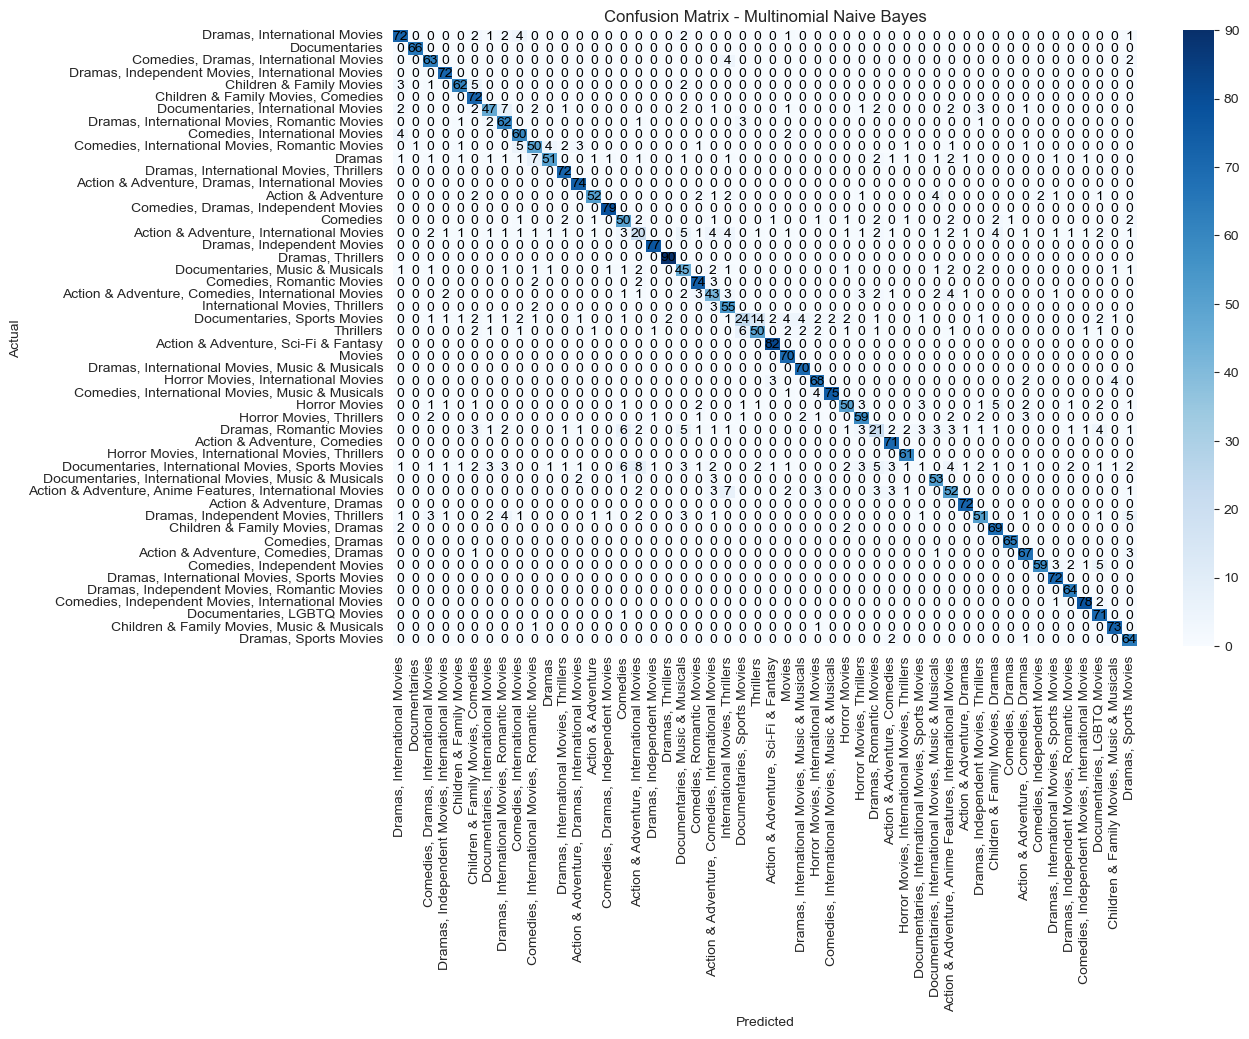

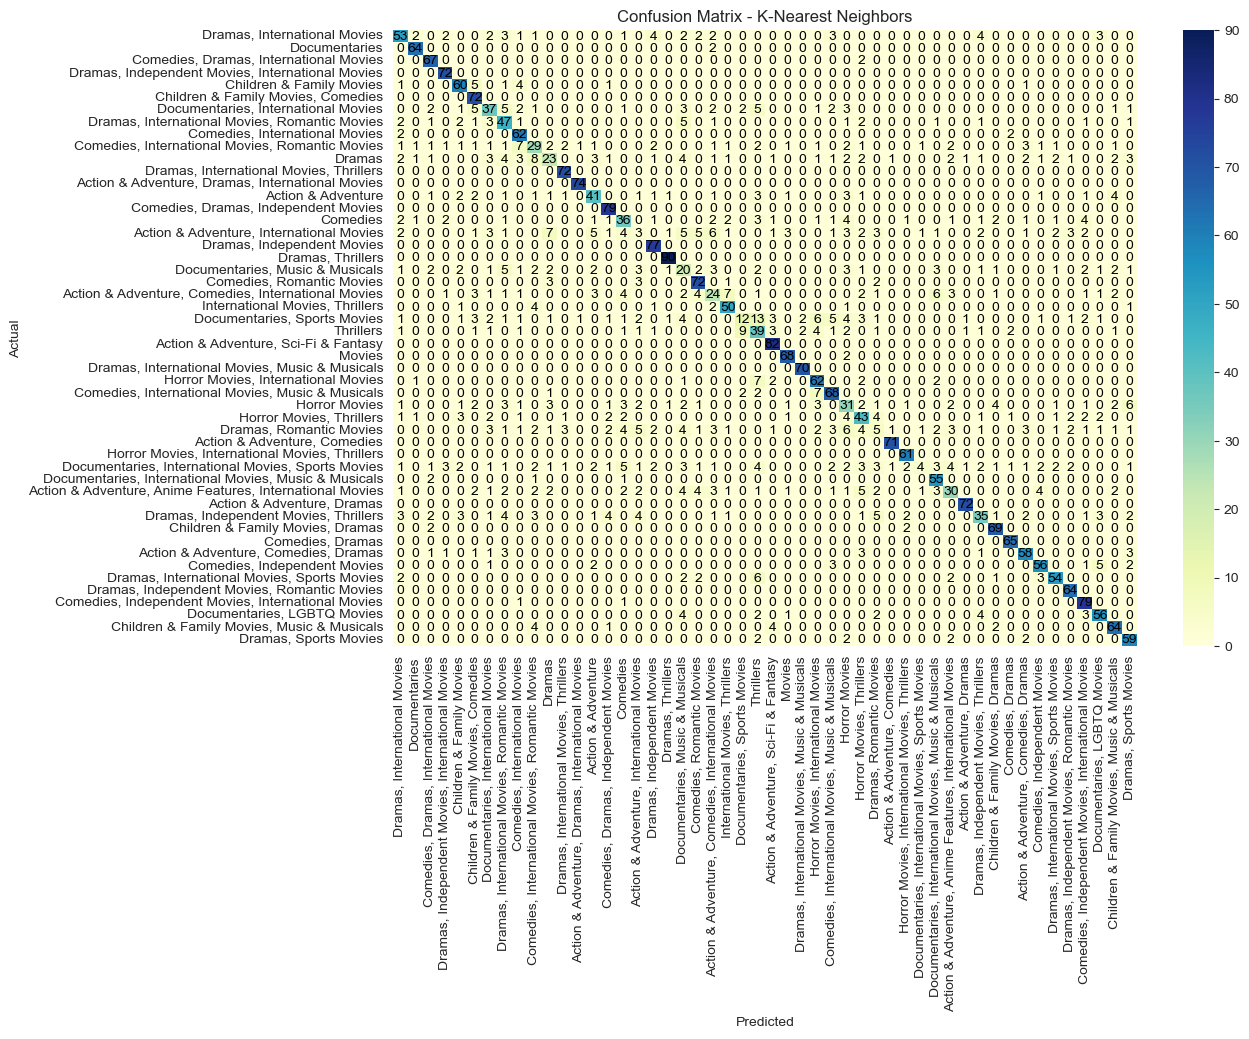

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings

warnings.filterwarnings("ignore")

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title, cmap):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(cm, cmap=cmap, annot=False, xticklabels=top_categories, yticklabels=top_categories)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            ax.text(j + 0.5, i + 0.5, cm[i, j], ha='center', va='center', color='black')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Define cmaps for MNB and KNN
cmap_mnb = "Blues"
cmap_knn = "YlGnBu"

# Plot confusion matrices for MNB and KNN with different cmaps
plot_confusion_matrix(y_test, y_pred_mnb, title='Confusion Matrix - Multinomial Naive Bayes', cmap=cmap_mnb)
plot_confusion_matrix(y_test, y_pred_knn, title='Confusion Matrix - K-Nearest Neighbors', cmap=cmap_knn)

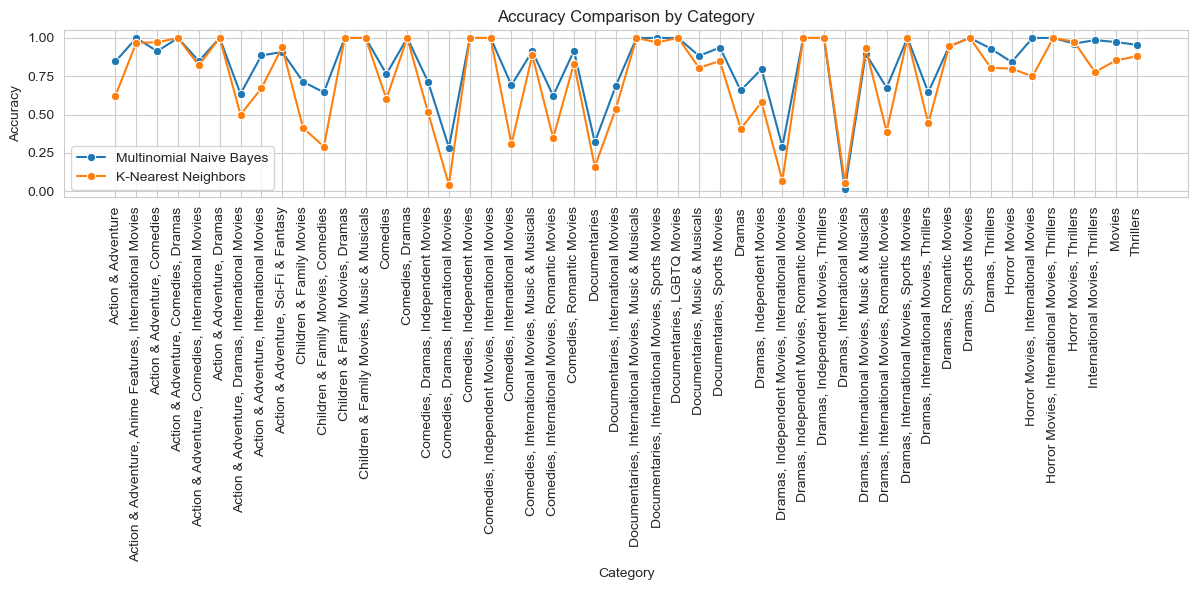

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate accuracy for each category
def category_accuracy(y_true, y_pred):
    categories = np.unique(y_true)
    accuracy_per_category = {}
    for category in categories:
        correct = np.sum((y_true == category) & (y_pred == category))
        total = np.sum(y_true == category)
        accuracy_per_category[category] = correct / total
    return accuracy_per_category

# Calculate accuracy per category for both models
mnb_accuracy_per_category = category_accuracy(y_test, y_pred_mnb)
knn_accuracy_per_category = category_accuracy(y_test, y_pred_knn)

# Convert accuracy dictionaries to pandas DataFrame for easy plotting
mnb_accuracy_df = pd.DataFrame(list(mnb_accuracy_per_category.items()), columns=['Category', 'MNB Accuracy'])
knn_accuracy_df = pd.DataFrame(list(knn_accuracy_per_category.items()), columns=['Category', 'KNN Accuracy'])

# Combine accuracy DataFrames
accuracy_df = pd.merge(mnb_accuracy_df, knn_accuracy_df, on='Category')

# Plot line graph for accuracy comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=accuracy_df, x='Category', y='MNB Accuracy', marker='o', label='Multinomial Naive Bayes')
sns.lineplot(data=accuracy_df, x='Category', y='KNN Accuracy', marker='o', label='K-Nearest Neighbors')
plt.title('Accuracy Comparison by Category')
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

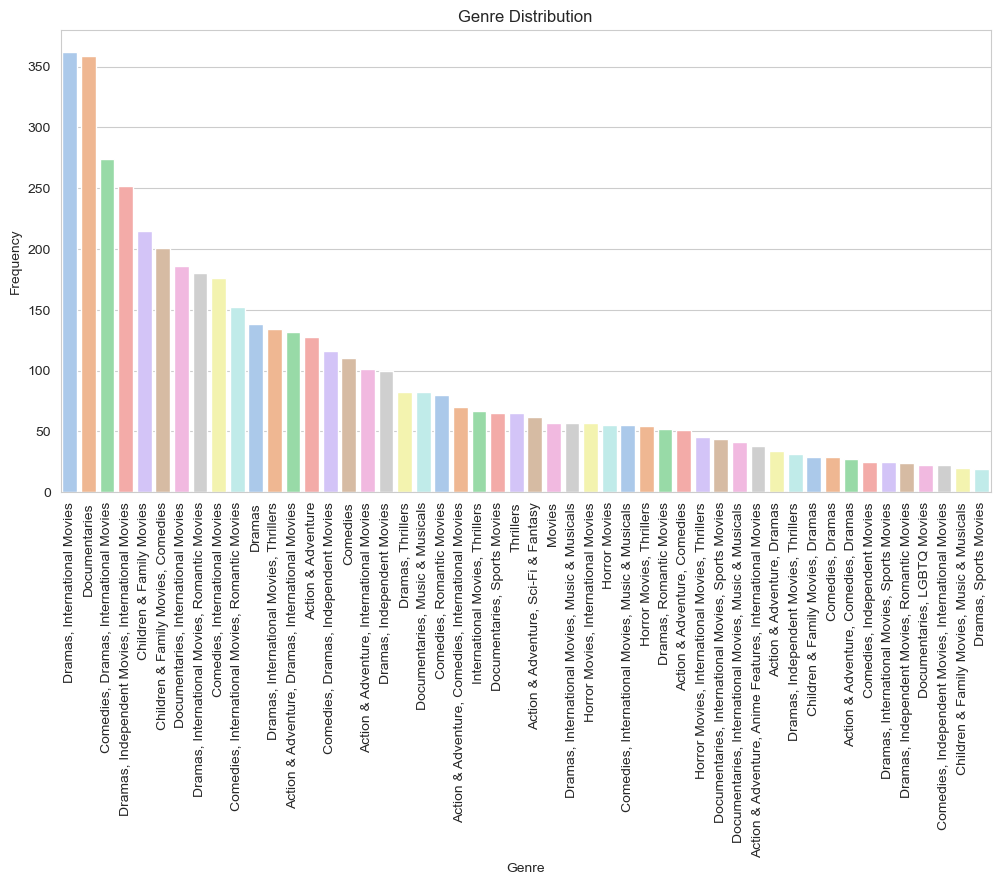

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
colors = sns.color_palette('pastel')

# Bar Plot of Genre Distribution
plt.figure(figsize=(12, 6))
genre_counts = movies_data_filtered['listed_in'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=colors)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

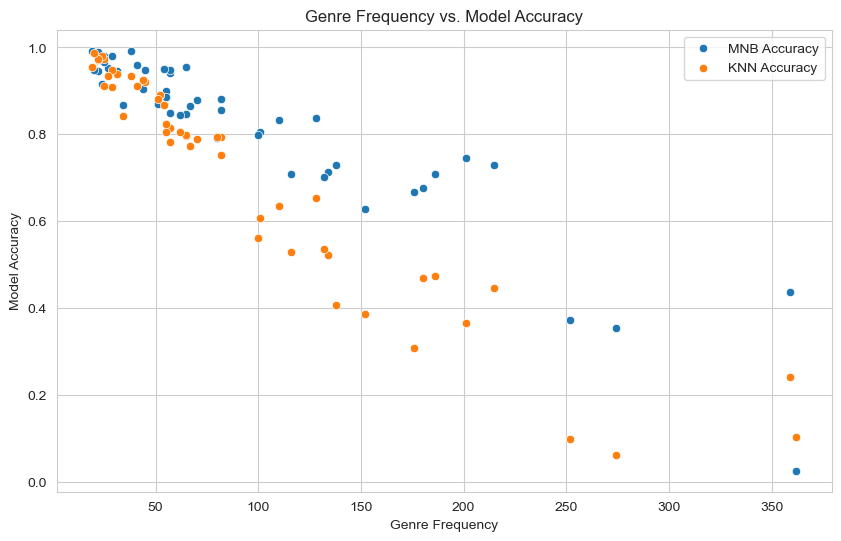

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate genre frequencies
genre_counts = movies_data_filtered['listed_in'].value_counts()

# Calculate accuracy for each genre using classification report
mnb_report = classification_report(y_test, y_pred, output_dict=True)
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)

# Extract genre names, accuracies for both models
genres = list(genre_counts.index)
mnb_accuracies = [mnb_report[genre]['f1-score'] for genre in genres]
knn_accuracies = [knn_report[genre]['f1-score'] for genre in genres]

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Genre': genres,
    'Genre Frequency': genre_counts.values,
    'MNB Accuracy': mnb_accuracies,
    'KNN Accuracy': knn_accuracies
})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Genre Frequency', y='MNB Accuracy', data=data, label='MNB Accuracy')
sns.scatterplot(x='Genre Frequency', y='KNN Accuracy', data=data, label='KNN Accuracy')
plt.title('Genre Frequency vs. Model Accuracy')
plt.xlabel('Genre Frequency')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

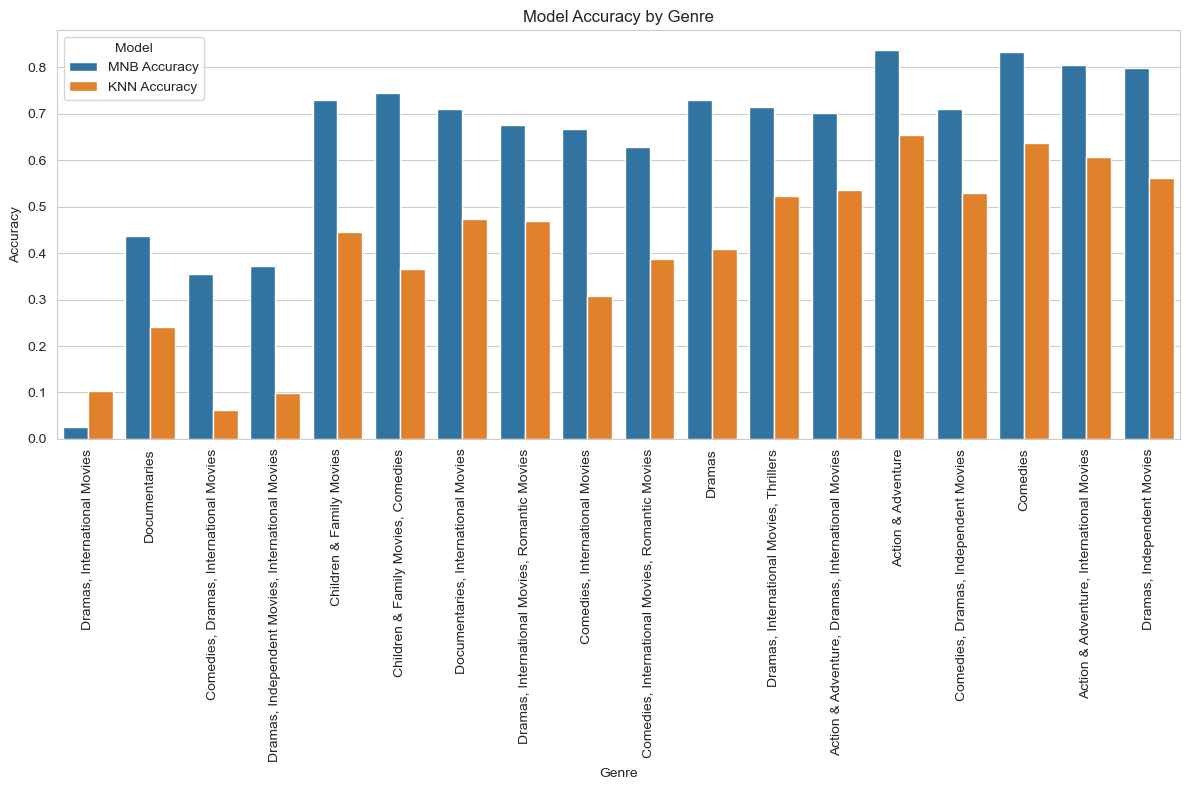

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Genre': genres,
    'MNB Accuracy': mnb_accuracies,
    'KNN Accuracy': knn_accuracies
})

# Melt the DataFrame to long format for seaborn
data_melted = data.melt(id_vars=['Genre'], var_name='Model', value_name='Accuracy')

# Bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='Accuracy', hue='Model', data=data_melted)
plt.title('Model Accuracy by Genre')
plt.xlabel('Genre')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

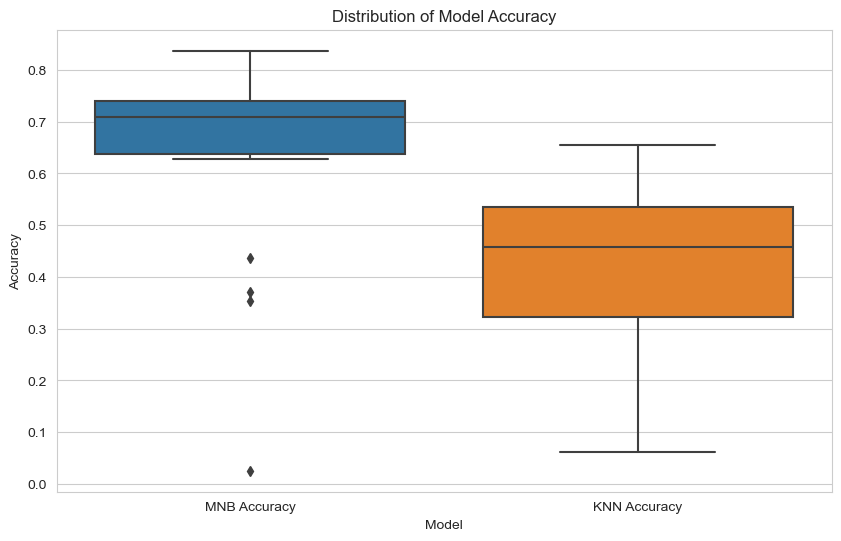

In [159]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Accuracy', data=data_melted)
plt.title('Distribution of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

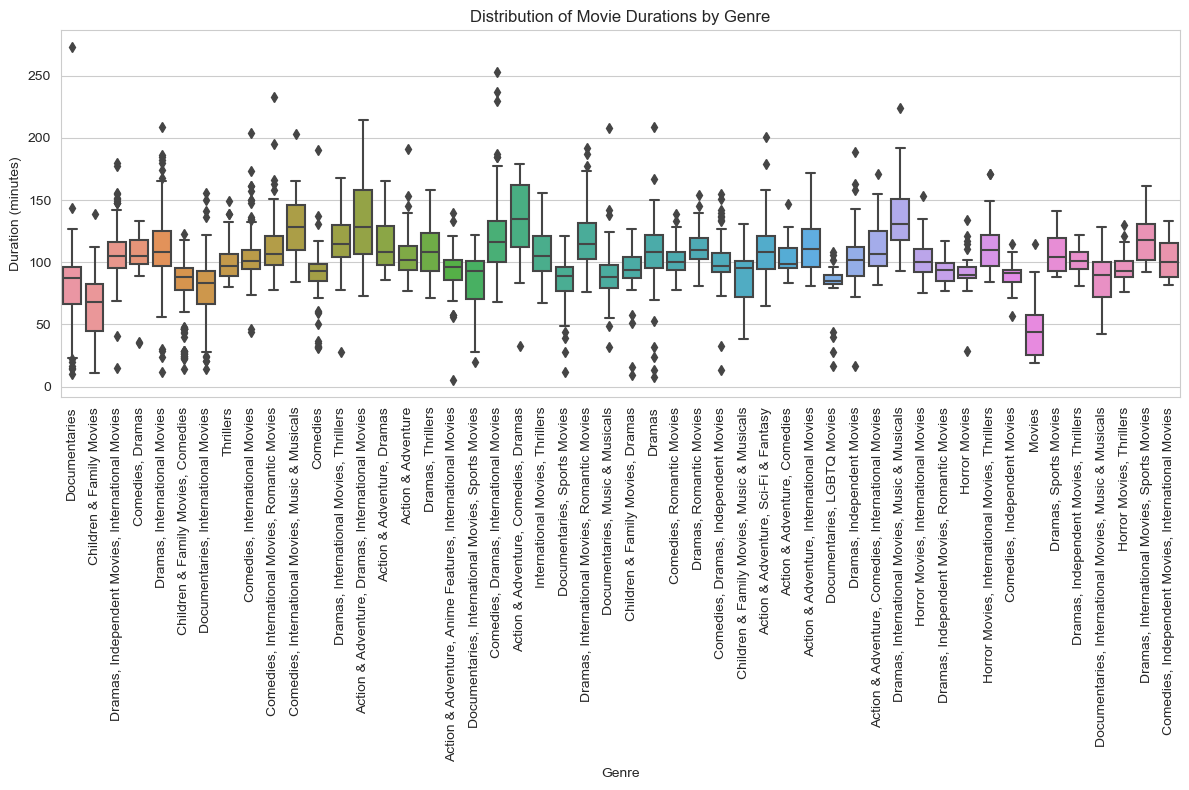

In [160]:
# Convert duration to numeric
movies_data_filtered['duration'] = movies_data_filtered['duration'].str.extract('(\d+)', expand=False).astype(float)

# Box plot of movie durations by genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='listed_in', y='duration', data=movies_data_filtered)
plt.title('Distribution of Movie Durations by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()